# EDA - (Análisis Exploratorio de Datos)

En esta sección, nos adentraremos en los conjuntos de datos que han sido preparados y limpios para llevar a cabo un análisis exploratorio detallado. La meta principal es comprender la distribución de los datos, identificar patrones y extraer información valiosa que pueda resultar fundamental para el desarrollo de modelos de recomendación. Además, emplearé los archivos que sirvieron como entrada inicial para respaldar y justificar algunas de las acciones que implementé en los notebooks de ETL para las reseñas de usuarios, los ítems de usuarios y los juegos de Steam.

Importamos BIBLIOTECAS necesarias

In [2]:
import pandas as pd # Importamos pandas para el análisis de datos
import matplotlib.pyplot as plt # importamos matplotlib para poder graficar esos datos
from wordcloud import WordCloud #Biblioteca para crear nubes de palabras en Python

Cargamos los datos

In [5]:
df_user_reviews = pd.read_csv('user_reviews_cleaned.csv')
df_idiomas =  pd.read_csv('resumen_idiomas.csv')

Estadisticas Descriptivas

In [6]:
df_user_reviews.describe(include='all')

,item_id,recommend,year,sentiment_analysis
count,44405.000000,44405,44405.000000,44405.000000
unique,NaN,2,NaN,NaN
top,NaN,True,NaN,NaN
freq,NaN,38882,NaN,NaN
mean,176590.654116,NaN,2014.250783,1.522148
std,131146.281220,NaN,0.828090,0.788729
min,10.000000,NaN,2010.000000,0.000000
25%,20900.000000,NaN,2014.000000,1.000000
50%,218620.000000,NaN,2014.000000,2.000000
75%,265650.000000,NaN,2015.000000,2.000000


# Variable categórica recommend en User Reviews

Esta columna contiene categorías que representan si algo es recomendado o no. Se estará utilizando para juegos MÁS recomendados por usuarios y desarrolladoras con juegos MENOS recomendados

In [7]:
# Calcula valores en la columna 'recommend' 
conteo_por_recomendaciones = df_user_reviews['recommend'].value_counts()
porcentaje_recomendaciones = df_user_reviews['recommend'].value_counts(normalize=True) * 100
#porcentaje_recomendaciones = porcentaje_recomendaciones.round(2).astype(str) + '%'

# Crear un nuevo DataFrame con el conteo y porcentaje
resumen_recomendaciones = pd.DataFrame({
    'Conteo': conteo_por_recomendaciones,
    'Porcentaje': porcentaje_recomendaciones.round(2).astype(str) + '%'
})

# Ordenar el DataFrame por el conteo de mayor a menor
resumen_recomendaciones = resumen_recomendaciones.sort_values(by='Conteo', ascending=False)

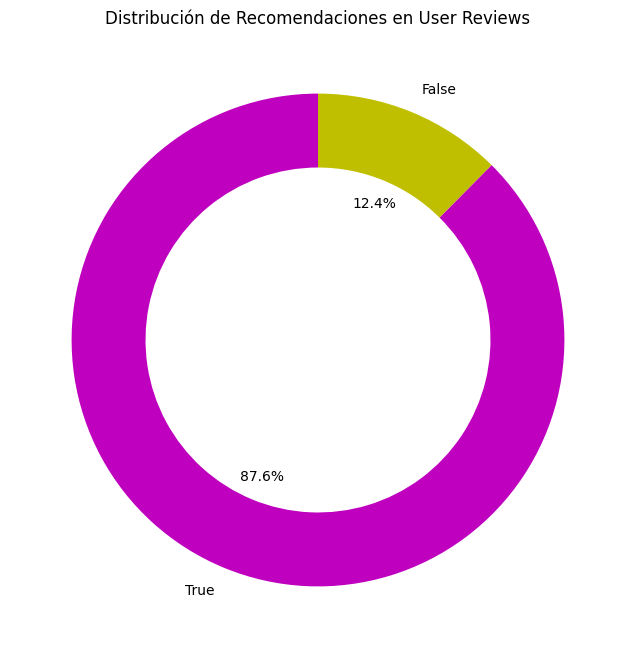

In [10]:
import matplotlib.pyplot as plt

# Crear un gráfico de pastel para visualizar las recomendaciones
plt.figure(figsize=(8, 8))
plt.pie(resumen_recomendaciones['Conteo'], labels=resumen_recomendaciones.index, autopct='%1.1f%%', colors=['#BF00BF', '#BFBF00'], startangle=90, wedgeprops=dict(width=0.3))
plt.title('Distribución de Recomendaciones en User Reviews')
plt.show()

Se puede señalar que hay un desbalance considerable en las recomendaciones con el 87.59% marcadas como verdaderas y solo el 12.41% como falsas. Este desbalance puede afectar la capacidad del modelo para aprender patrones en las recomendaciones negativas debido a la falta de ejemplos.

Impacto en el Modelo:
En situaciones de desbalance, algunos algoritmos pueden tener dificultades para aprender patrones en la clase minoritaria.

Relevancia de las Recomendaciones Positivas:
Existe una alta proporción de recomendaciones positivas, se podría considerar a mayor profundidad para conocer realmente si esto refleja la naturaleza de las reseñas de usuarios en la plataforma ó si hay sesgos en la recopilación de datos.

# Variable categórica year en User Reviews
 
'year' representa el año en que los usuario realizaron la reseña.

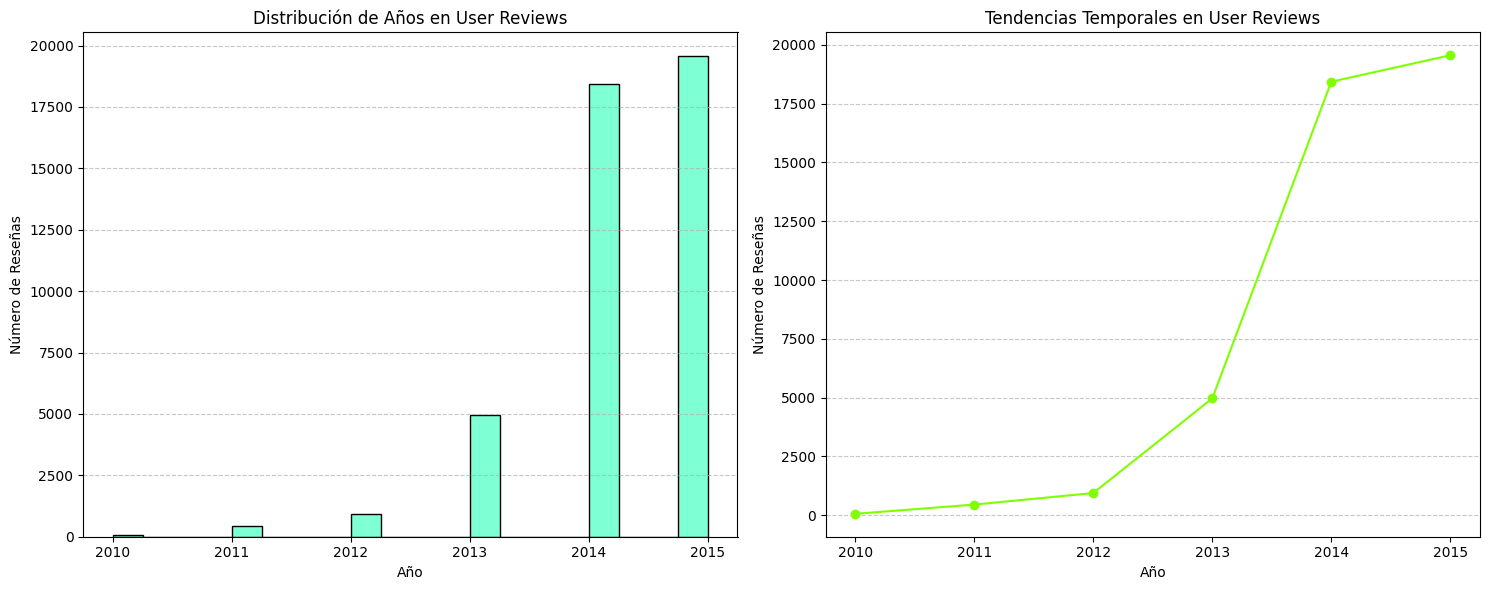

In [12]:
import matplotlib.pyplot as plt

# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Histograma de la distribución de años
axs[0].hist(df_user_reviews['year'], bins=20, color='#7FFFD4', edgecolor='black')
axs[0].set_title('Distribución de Años en User Reviews')
axs[0].set_xlabel('Año')
axs[0].set_ylabel('Número de Reseñas')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico de líneas para mostrar tendencias temporales
trends = df_user_reviews['year'].value_counts().sort_index()
axs[1].plot(trends.index, trends.values, marker='o', linestyle='-', color='#7FFF00')
axs[1].set_title('Tendencias Temporales en User Reviews')
axs[1].set_xlabel('Año')
axs[1].set_ylabel('Número de Reseñas')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Los gráficos de distribución de años y tendencias temporales no solo ofrecen una visión detallada, sino que también pintan un cuadro audaz de cómo las reseñas de usuarios en la plataforma Steam han evolucionado a lo largo del tiempo. Aquí te dejo algunos puntos clave que destacan la verdadera esencia:

Histograma de Distribución de Años:
La batalla de las reseñas se libra mayormente en los campos de los años recientes, especialmente en 2014 y 2015, con un toque de actividad en 2013. En el otro extremo, el 2010 se encuentra en la categoría de "la nostalgia del mínimo", señalando un salto impresionante en la participación de usuarios. Este fenómeno subraya la expansión apoteósica y la creciente admiración que la plataforma Steam ha cosechado en los últimos años.

Gráfico de Líneas de Tendencias Temporales:
La tendencia temporal es un relato ininterrumpido de ascenso, una narrativa que revela un crecimiento constante en el número de reseñas a medida que avanzamos en el tiempo. La línea alcanza su climax en 2015, un año que sirve como testigo de un apogeo deslumbrante en la actividad de reseñas.

La intrincada relación entre la distribución de años y la tendencia temporal ratifica que, aunque hay un aumento general en las reseñas, hay años específicos que se alzan como héroes, contribuyendo de manera colosal a este apoteósico crecimiento.
Este análisis respalda con fuerza la necesidad de tener en cuenta el factor temporal al confeccionar un modelo de recomendación, ya que las preferencias de los usuarios evolucionan a medida que avanza el reloj.
La concentración puntual en ciertos años insinúa la posibilidad de lanzamientos épicos de juegos o cambios estratégicos en la plataforma, factores que pueden influir de manera extraordinaria en la actividad de reseñas.
En resumen, estos descubrimientos no solo proporcionan una sólida base, sino que también establecen las coordenadas esenciales para la construcción del modelo de recomendación, subrayando la imperiosa necesidad de estar atentos a la marea del tiempo.

# Variable categórica sentiment_analysis en User Reviews
Esta columna es un Feature Engineering. Es una nueva característica que fue creada con el objetivo de mejorar el rendimiento del futuro modelo de Machine Learning a partir de la columna 'reviews' que estaba presente en el conjunto de datos inicial e incluía reseñas de juegos hechos por distintos usuarios.

Antes de aplicar el análisis de sentimiento se evaluó la columna 'review' para obtener estadísticas sobre la cantidad de reseñas por lenguaje. Este análisis era crucial para determinar si el proceso de análisis de sentimientos se realizaría en todo el conjunto de datos ó si se aplicaría un filtro específico por idioma.

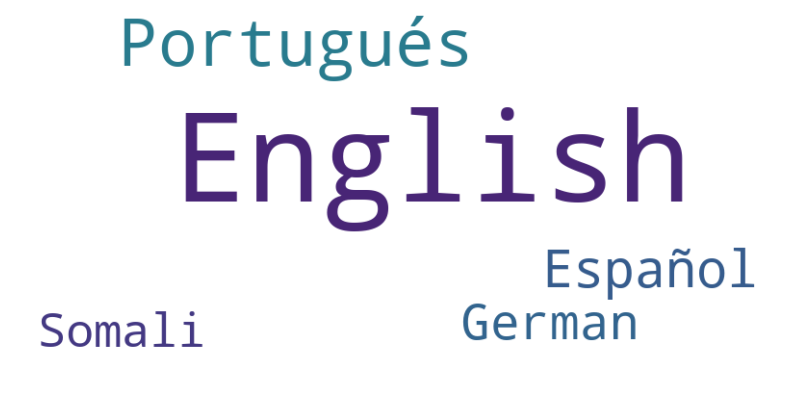

In [13]:
# Crear un diccionario con los datos del DataFrame
df_idiomas_dict = dict(zip(df_idiomas['Idioma'], df_idiomas['Conteo']))

# Colores personalizados
colores = ['#FF7F50', '#6495ED', '#FFF8DC', '#DC143C', '#00FFFF']

# Crear la nube de palabras con colores personalizados
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(df_idiomas_dict)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Tras obtener los resultados, tomé la decisión de llevar a cabo el análisis de sentimiento exclusivamente en los registros en inglés, dado que conforman una parte sustancial del conjunto de datos, superando el 70%. Durante el proceso ETL, se eliminaron las reseñas que no estaban en inglés. Aquí detallo algunas razones que respaldan esta elección:

### Justificación de la Selección del Idioma:
1. __Mayor Representatividad:__

- Al enfocarnos en el inglés, que constituye la mayoría, logramos un análisis de sentimiento más representativo de la mayoría de las reseñas en el conjunto de datos. Esto resulta especialmente útil al buscar comprender las opiniones predominantes en la audiencia principal.
2. __Precisión del Modelo:__

- Los modelos de análisis de sentimiento suelen estar optimizados para un idioma específico, y el inglés es comúnmente uno de los idiomas mejor cubiertos. Esta elección tiene el potencial de mejorar la precisión de los resultados.
3. __Eficiencia Computacional:__

Reducir el conjunto de datos a solo los registros en inglés puede mejorar la eficiencia computacional, ya que el análisis se realizará en un conjunto de datos más manejable.
### Herramientas Utilizadas:
1. __NLTK con Analizador de Sentimientos de Vader:__
- Se eligió la biblioteca NLTK con el analizador de sentimientos de Vader. Este proporciona una puntuación compuesta que clasifica la polaridad de las reseñas en negativas (valor '0'), neutrales (valor '1') o positivas (valor '2'). Las reseñas sin texto asignado recibieron el valor '1'.
### Justificación de la Elección de Herramientas:
1. __Facilidad de Implementación:__

- NLTK es una biblioteca de procesamiento de lenguaje natural popular y el analizador de sentimientos de Vader es sencillo de implementar. Requiere menos configuración en comparación con enfoques más avanzados, siendo idóneo para aplicaciones prácticas.
2. __Eficiencia Computacional:__

- El analizador de sentimientos de Vader es eficiente computacionalmente, crucial para manejar grandes conjuntos de datos en entornos empresariales.
3. __Polaridad Compuesta:__

- La puntuación compuesta ofrece una representación única y fácil de interpretar de la polaridad de la reseña, asignando valores numéricos a las categorías de sentimientos.
4. __Niveles Aceptables de Precisión:__

Aunque no es perfecto, el analizador de sentimientos de Vader es conocido por su rendimiento aceptable en situaciones prácticas, proporcionando resultados razonables para tareas de análisis de sentimientos.
### Consideraciones Finales:
1. __Adaptabilidad del Método:__

- Es crucial reconocer que la precisión puede variar según el contexto específico del conjunto de datos y el lenguaje utilizado en las reseñas. Para futuras fases, se podría considerar la exploración de enfoques más avanzados, dependiendo de las necesidades específicas y la precisión requerida.
2. __En Resumen:__

El enfoque seleccionado con el analizador de sentimientos de Vader en NLTK se elige por su equilibrio entre facilidad de implementación, eficiencia computacional y niveles aceptables de precisión para el propósito del análisis de sentimientos en este contexto específico.

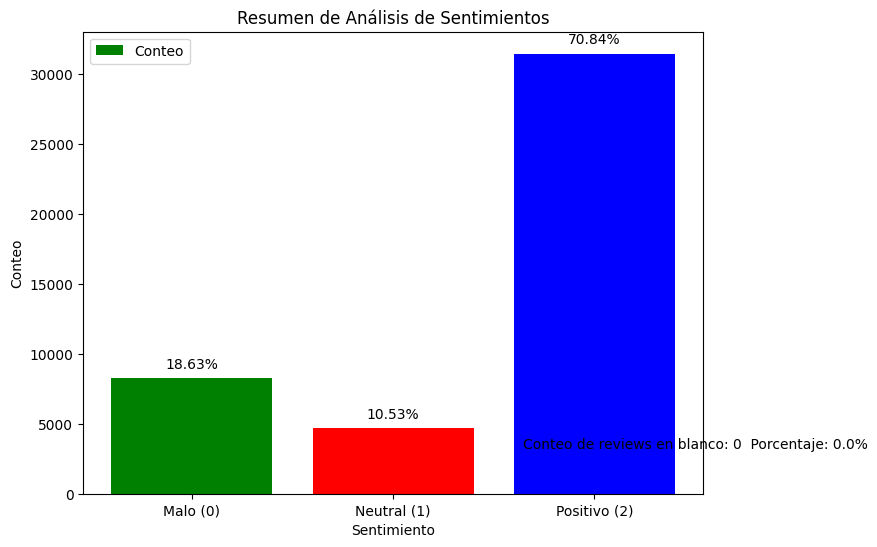

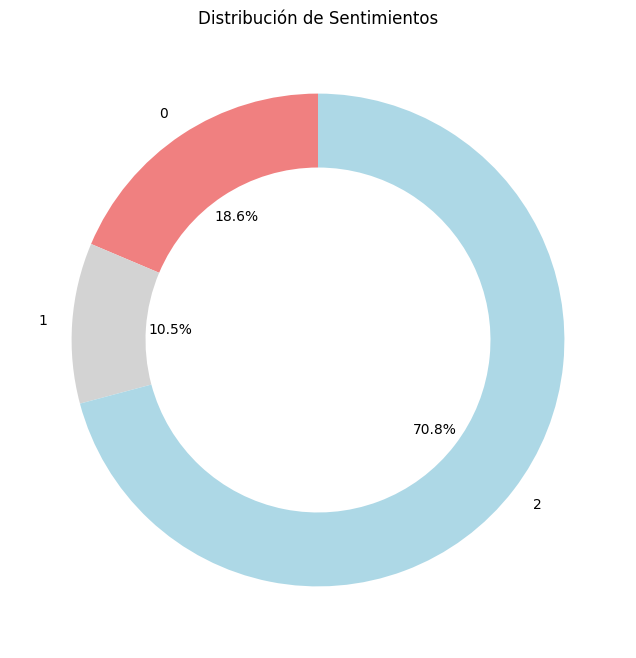

In [14]:
import matplotlib.pyplot as plt

# Calcular el resumen de análisis de sentimientos
sentiment_summary = df_user_reviews['sentiment_analysis'].value_counts()
percentage_summary = (df_user_reviews['sentiment_analysis'].value_counts(normalize=True) * 100).round(2)

# Crear un nuevo DataFrame con el resumen
resumen_sentimientos = pd.DataFrame({
    'Conteo': sentiment_summary,
    'Porcentaje': percentage_summary.astype(str) + '%'
})

# Ordenar el DataFrame por el conteo de mayor a menor
resumen_sentimientos = resumen_sentimientos.sort_index()

# Visualizar el resumen con gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(8, 6))

# Crear barras apiladas para el conteo
ax.bar(resumen_sentimientos.index, resumen_sentimientos['Conteo'], color=['green', 'red', 'blue'], label='Conteo')

# Mostrar porcentajes encima de las barras
for i, v in enumerate(resumen_sentimientos['Porcentaje']):
    ax.text(i, resumen_sentimientos['Conteo'][i] + 500, f"{v}", ha='center', va='bottom')

# Configurar el gráfico
ax.set_title('Resumen de Análisis de Sentimientos')
ax.set_xlabel('Sentimiento')
ax.set_ylabel('Conteo')
ax.set_xticks(resumen_sentimientos.index)
ax.set_xticklabels(['Malo (0)', 'Neutral (1)', 'Positivo (2)'])
ax.legend()

# Mostrar el conteo de reviews en blanco
conteo_reviews_en_blanco = (df_user_reviews['sentiment_analysis'].isnull()).sum()
porcentaje_reviews_en_blanco = (conteo_reviews_en_blanco / len(df_user_reviews) * 100).round(2)
ax.text(2.5, 3000, f"Conteo de reviews en blanco: {conteo_reviews_en_blanco}  Porcentaje: {porcentaje_reviews_en_blanco}%", ha='center', va='bottom')

plt.show()

# Visualizar el resumen con gráfico de pastel
fig, ax = plt.subplots(figsize=(8, 8))

# Crear un gráfico de pastel con colores personalizados
colores = ['lightcoral', 'lightgrey', 'lightblue']
ax.pie(resumen_sentimientos['Conteo'], labels=resumen_sentimientos.index, autopct='%1.1f%%', colors=colores, startangle=90, wedgeprops=dict(width=0.3))
ax.set_title('Distribución de Sentimientos')

plt.show()


En el análisis de sentimientos de las reseñas en la columna 'sentiment_analysis', se revelan las siguientes tendencias:

### Positivo (2):
- Este es el dominio preponderante en las reseñas, abarcando un significativo 70.83% del total. Esta predominancia señala que la gran mayoría de las reseñas están impregnadas de un sentimiento positivo.
### Neutral (1):
- Aunque en menor proporción, un 10.53% de las reseñas se clasifican como neutrales. Esta clasificación sugiere que algunos usuarios expresan opiniones sin un sesgo claramente positivo o negativo.
### Negativo (0):
- La categoría de sentimiento negativo muestra una presencia más reducida, constituyendo el 18.63%. Esto indica que, en general, la plataforma tiene una inclinación positiva en las reseñas de los usuarios.
### Consideraciones:
- La mayoría de los usuarios tiende a expresar opiniones positivas en sus reseñas.
- La proporción de reseñas neutrales es relativamente baja, lo que indica que la mayoría de los usuarios tiende a tener opiniones claramente positivas o negativas.

Estos hallazgos resaltan la inclinación general hacia opiniones positivas en la plataforma y la polarización de las expresiones de los usuarios entre extremos, ya sea positivas o negativas.